Implementing Regression Model using Household Power Consumption Dataset

Life cycle of a Machine Learning project

Understanding Problem Statement 
Data Collection
Exploratory Data Analysis 
Data Cleaning 
Pre-processing of Data 
Model Training 
Picking the Best Model 

In [1]:
## Importing required libs

## Reading the data
import pandas as pd
import numpy as np
import datetime as dt


## Visualization of the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## Uploading the data
import pymongo

## Standardization
from sklearn.preprocessing import StandardScaler

## Back up of Standard data
import pickle

## Encoding Categorical Data
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Splitting the data into Train and Test 
from sklearn.model_selection import train_test_split

## Classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## Evaluation
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Data Ingestion

In [3]:
data = pd.read_csv("C:/Users/nawin/household_power_consumption.txt", sep=';')

In [4]:
print("The number of rows and columns are:",data.shape)

The number of rows and columns are: (2075259, 9)


In [5]:
print("The name of columns are:", data.columns)

The name of columns are: Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [6]:
## considering 2.5percent of model
data1 = data.sample(frac=.025, random_state=33)
data1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
28343,5/1/2007,09:47:00,2.424,0.236,238.320,10.200,0.000,0.000,0.0
911516,9/9/2008,17:20:00,0.340,0.206,241.270,1.600,0.000,1.000,0.0
1686416,1/3/2010,20:20:00,1.828,0.000,237.990,7.600,0.000,0.000,1.0
384969,10/9/2007,01:33:00,0.108,0.000,239.540,0.400,0.000,0.000,0.0
220807,19/5/2007,01:31:00,0.392,0.182,236.760,1.800,0.000,0.000,0.0


In [7]:
print("The number of rows and columns are:",data1.shape)

The number of rows and columns are: (51881, 9)


In [8]:
print("The name of columns are:", data1.columns)

The name of columns are: Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [9]:
## Seperating columns form Date
data1['Date'] = pd.to_datetime(data1['Date'])
data1['year'] = data1['Date'].dt.year
data1['month'] = data1['Date'].dt.month
data1['day'] = data1['Date'].dt.day

In [10]:
## Seperating columns for Time
data1['hour'] = pd.to_datetime(data1['Time'], format='%H:%M:%S').dt.hour
data1['minutes'] = pd.to_datetime(data1['Time'], format='%H:%M:%S').dt.minute
data1['seconds'] = pd.to_datetime(data1['Time'], format='%H:%M:%S').dt.second

In [11]:
## Data Cleaning
## checking unique values in features to identify '?'
for feature in [feature for feature in data1.columns if feature not in ['Date', 'Time', 'year', 'month', 'day', 'hour', 'minutes', 'seconds']]:
    print('Feature {} has {} number of ? values'.format(feature, data1[data1[feature] == '?'].shape[0]))

Feature Global_active_power has 648 number of ? values
Feature Global_reactive_power has 648 number of ? values
Feature Voltage has 648 number of ? values
Feature Global_intensity has 648 number of ? values
Feature Sub_metering_1 has 648 number of ? values
Feature Sub_metering_2 has 648 number of ? values
Feature Sub_metering_3 has 0 number of ? values


In [12]:
## Replacing '?' with nan
for column in data1[['Voltage', 'Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 
                  'Sub_metering_2']]:
    data1[column] = data1[column].replace('?', np.nan)

In [13]:
## Checking null values
data1.isnull().any()

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
year                     False
month                    False
day                      False
hour                     False
minutes                  False
seconds                  False
dtype: bool

In [14]:
## Sum of null values
data1.isnull().sum()

Date                       0
Time                       0
Global_active_power      648
Global_reactive_power    648
Voltage                  648
Global_intensity         648
Sub_metering_1           648
Sub_metering_2           648
Sub_metering_3           648
year                       0
month                      0
day                        0
hour                       0
minutes                    0
seconds                    0
dtype: int64

In [15]:
## Changing datatypes and filling na values with mean 
data1['Global_reactive_power']=data1['Global_reactive_power'].astype(float)
data1['Global_reactive_power']=data1['Global_reactive_power'].fillna(data1['Global_reactive_power'].mean())
data1['Voltage']=data1['Voltage'].astype(float)
data1['Voltage']=data1['Voltage'].fillna(data1['Voltage'].mean())
data1['Global_active_power']=data1['Global_active_power'].astype(float)
data1['Global_active_power']=data1['Global_active_power'].fillna(data1['Global_active_power'].mean())
data1['Global_intensity']=data1['Global_intensity'].astype(float)
data1['Global_intensity']=data1['Global_intensity'].fillna(data1['Global_intensity'].mean())
data1['Sub_metering_1']=data1['Sub_metering_1'].astype(float)
data1['Sub_metering_1']=data1['Sub_metering_1'].fillna(data1['Sub_metering_1'].mean())
data1['Sub_metering_2']=data1['Sub_metering_2'].astype(float)
data1['Sub_metering_2']=data1['Sub_metering_2'].fillna(data1['Sub_metering_2'].mean())
data1['Sub_metering_3']=data1['Sub_metering_3'].astype(float)
data1['Sub_metering_3']=data1['Sub_metering_3'].fillna(data1['Sub_metering_3'].mean())

In [16]:
## Checking null values
data1.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
hour                     0
minutes                  0
seconds                  0
dtype: int64

In [17]:
print("The datatypes of columns are \n",data1.dtypes)

The datatypes of columns are 
 Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
year                              int64
month                             int64
day                               int64
hour                              int64
minutes                           int64
seconds                           int64
dtype: object


In [18]:

for column in data1.columns:
    print(f"Feature {column} has {data1[column].unique()} unique features after replacement")

Feature Date has ['2007-05-01T00:00:00.000000000' '2008-09-09T00:00:00.000000000'
 '2010-01-03T00:00:00.000000000' ... '2009-08-16T00:00:00.000000000'
 '2009-02-10T00:00:00.000000000' '2009-01-14T00:00:00.000000000'] unique features after replacement
Feature Time has ['09:47:00' '17:20:00' '20:20:00' ... '12:10:00' '12:22:00' '07:29:00'] unique features after replacement
Feature Global_active_power has [2.424 0.34  1.828 ... 5.246 4.352 4.342] unique features after replacement
Feature Global_reactive_power has [0.236      0.206      0.         0.182      0.1        0.322
 0.056      0.108      0.176      0.078      0.12359175 0.154
 0.166      0.082      0.118      0.086      0.12       0.216
 0.132      0.23       0.24       0.192      0.21       0.104
 0.436      0.258      0.072      0.242      0.048      0.186
 0.114      0.06       0.26       0.136      0.096      0.164
 0.348      0.178      0.35       0.05       0.068      0.494
 0.304      0.074      0.442      0.052      0.122

In [19]:
data1['Total_Metering'] = data1['Sub_metering_1']+data1['Sub_metering_2']+data1['Sub_metering_3']
data1['Voltage']=data1['Voltage'].astype(float)
print("The datatypes of columns are \n",data1.dtypes)

The datatypes of columns are 
 Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
year                              int64
month                             int64
day                               int64
hour                              int64
minutes                           int64
seconds                           int64
Total_Metering                  float64
dtype: object


In [20]:
data1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minutes,seconds,Total_Metering
28343,2007-05-01,09:47:00,2.424,0.236,238.32,10.2,0.0,0.0,0.0,2007,5,1,9,47,0,0.0
911516,2008-09-09,17:20:00,0.340,0.206,241.27,1.6,0.0,1.0,0.0,2008,9,9,17,20,0,1.0
1686416,2010-01-03,20:20:00,1.828,0.000,237.99,7.6,0.0,0.0,1.0,2010,1,3,20,20,0,1.0
384969,2007-10-09,01:33:00,0.108,0.000,239.54,0.4,0.0,0.0,0.0,2007,10,9,1,33,0,0.0
220807,2007-05-19,01:31:00,0.392,0.182,236.76,1.8,0.0,0.0,0.0,2007,5,19,1,31,0,0.0


In [21]:
# Removing the unnecessary features

data2 = data1.drop(columns=['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'seconds'])
data2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,day,hour,minutes,Total_Metering
28343,2.424,0.236,238.32,10.2,2007,5,1,9,47,0.0
911516,0.340,0.206,241.27,1.6,2008,9,9,17,20,1.0
1686416,1.828,0.000,237.99,7.6,2010,1,3,20,20,1.0
384969,0.108,0.000,239.54,0.4,2007,10,9,1,33,0.0
220807,0.392,0.182,236.76,1.8,2007,5,19,1,31,0.0


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51881 entries, 28343 to 1141239
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    51881 non-null  float64
 1   Global_reactive_power  51881 non-null  float64
 2   Voltage                51881 non-null  float64
 3   Global_intensity       51881 non-null  float64
 4   year                   51881 non-null  int64  
 5   month                  51881 non-null  int64  
 6   day                    51881 non-null  int64  
 7   hour                   51881 non-null  int64  
 8   minutes                51881 non-null  int64  
 9   Total_Metering         51881 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 4.4 MB


In [23]:
print("The name of columns are:", data2.columns)

The name of columns are: Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'year', 'month', 'day', 'hour', 'minutes',
       'Total_Metering'],
      dtype='object')


In [24]:
print("The basic Statistsical Summary of numerical features \n", data2.describe().T)

The basic Statistsical Summary of numerical features 
                          count         mean        std       min       25%  \
Global_active_power    51881.0     1.096967   1.054398     0.078     0.310   
Global_reactive_power  51881.0     0.123592   0.111848     0.000     0.048   
Voltage                51881.0   240.826240   3.223254   226.090   239.000   
Global_intensity       51881.0     4.650928   4.430990     0.200     1.400   
year                   51881.0  2008.442879   1.129602  2006.000  2007.000   
month                  51881.0     6.511228   3.428720     1.000     4.000   
day                    51881.0    15.659548   8.822386     1.000     8.000   
hour                   51881.0    11.492974   6.933948     0.000     5.000   
minutes                51881.0    29.501552  17.272246     0.000    15.000   
Total_Metering         51881.0     8.926864  12.847673     0.000     0.000   

                            50%       75%       max  
Global_active_power       0.638 

In [25]:
Num_fea = [feature for feature in data2.columns if data2[feature].dtype != 'object' and data2[feature].dtype != 'datetime64[ns]']

# Discrete Numerical features
Num_discrete = [feature for feature in data2.columns if data2[feature].dtype == 'int']

print(Num_fea)

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'year', 'month', 'day', 'hour', 'minutes', 'Total_Metering']


<Figure size 1080x720 with 0 Axes>

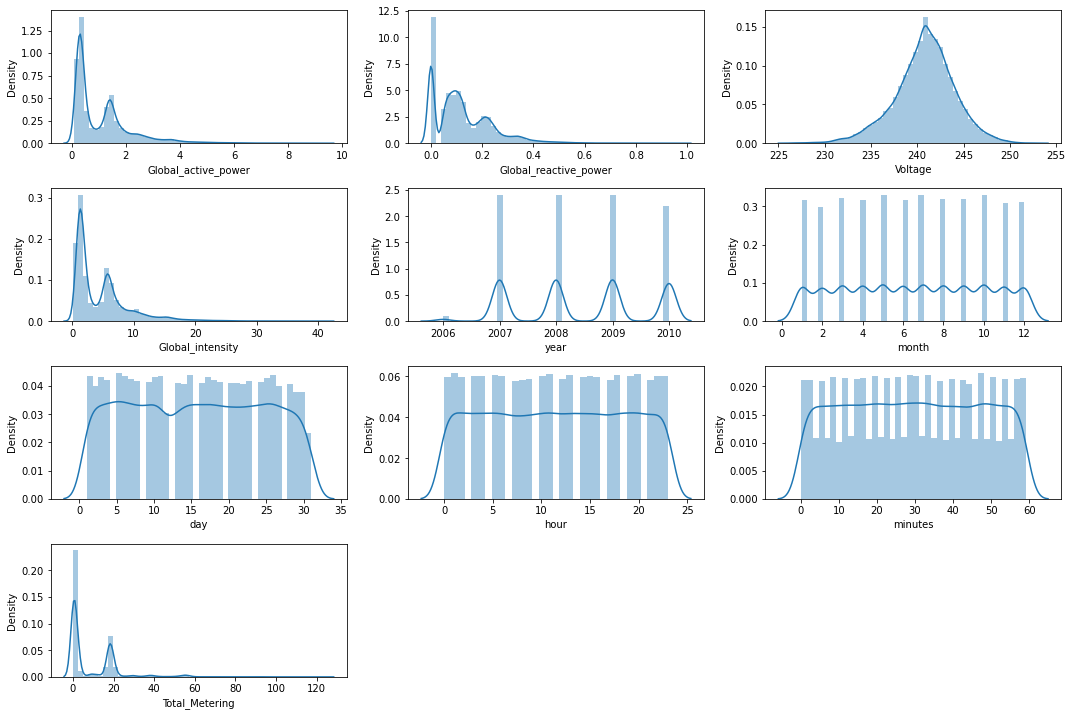

In [26]:
## Univariate Analysis

## Visualizing  distribution of features
plt.figure(figsize=(15,10))
plt.suptitle('')

plt.figure(figsize=(15,10))
for i in range(0,len(Num_fea)):
    plt.subplot(4,3, i+1)
    sns.distplot(x=data2[Num_fea[i]])
    plt.xlabel(Num_fea[i])
    plt.tight_layout()
    

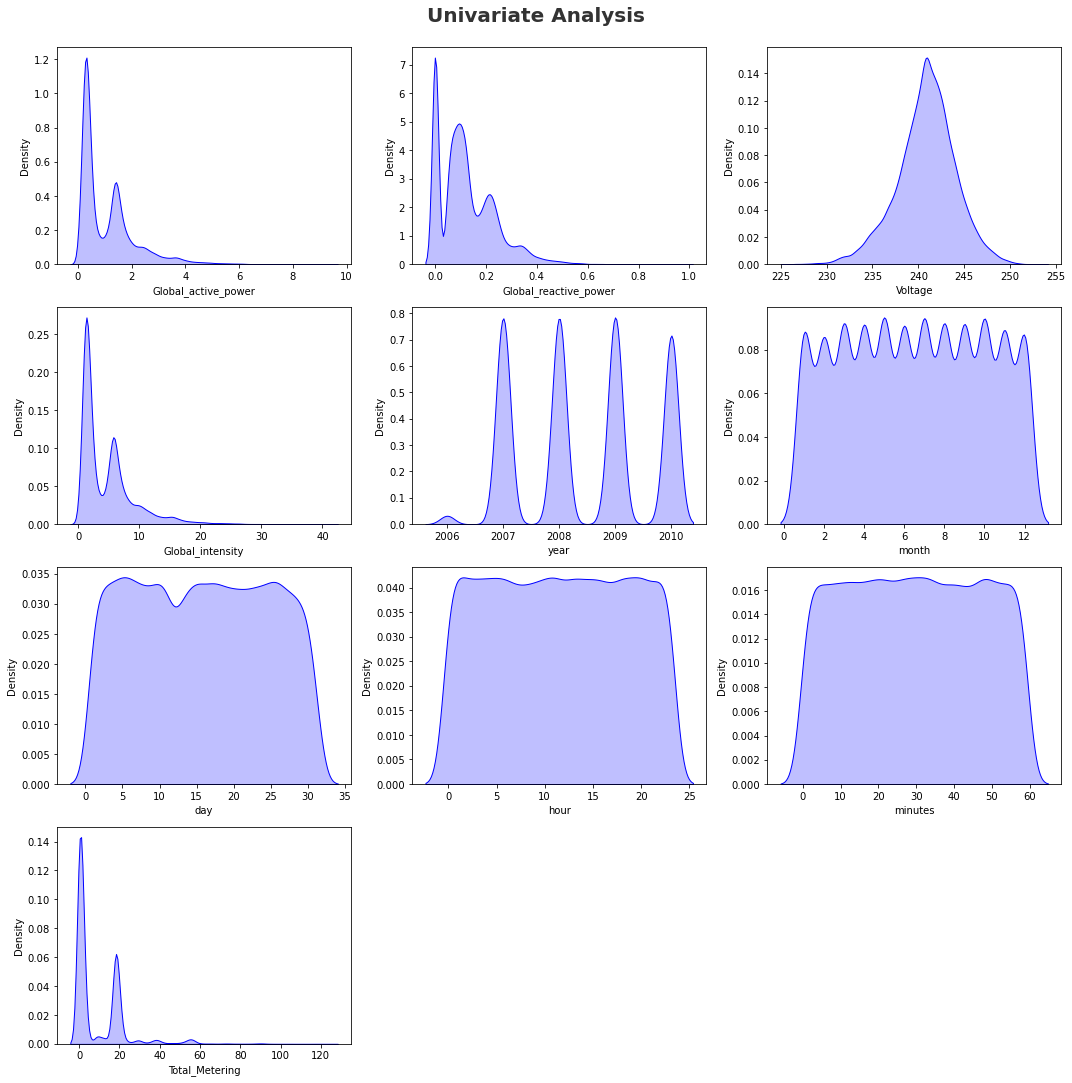

In [27]:
## kde plot : Checking the skewness
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(Num_fea)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=data2[Num_fea[i]], shade=True, color='b')
    plt.xlabel(Num_fea[i])
    plt.tight_layout()

In [28]:
## Bivariate Analysis

<AxesSubplot:xlabel='hour', ylabel='Total_Metering'>

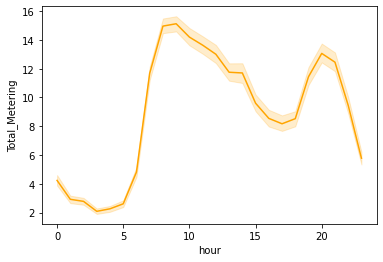

In [29]:
sns.lineplot(x='hour',y="Total_Metering", data=data2, color='orange')

<AxesSubplot:xlabel='month', ylabel='Total_Metering'>

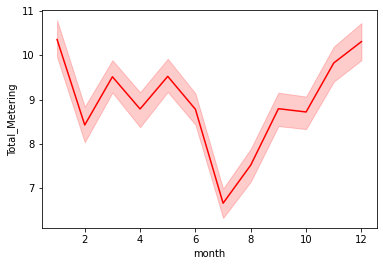

In [30]:
sns.lineplot(x='month',y="Total_Metering", data=data2, color='red')

<AxesSubplot:xlabel='year', ylabel='Total_Metering'>

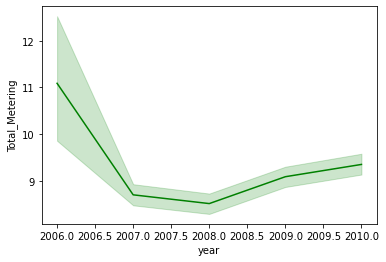

In [31]:
sns.lineplot(x='year',y="Total_Metering", data=data2, color='green')

<AxesSubplot:xlabel='Voltage', ylabel='Total_Metering'>

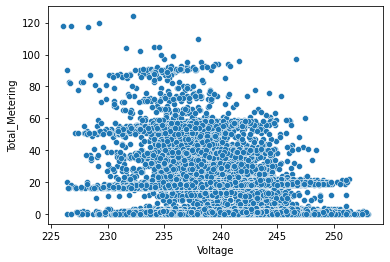

In [32]:
sns.scatterplot(x=data2['Voltage'], y=data2['Total_Metering'])
## no corelation between voltage and Total_metering

<AxesSubplot:xlabel='Global_intensity', ylabel='Total_Metering'>

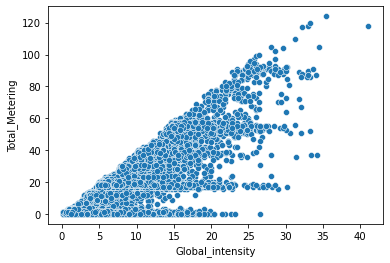

In [33]:
sns.scatterplot(x=data2['Global_intensity'], y=data2['Total_Metering'])
## positively correlated

In [34]:
## Multivariate Analysis
data2.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,day,hour,minutes,Total_Metering
Global_active_power,1.000000,0.245318,-0.393509,0.998891,-0.034391,0.004341,-0.018066,0.280760,0.000487,0.846171
Global_reactive_power,0.245318,1.000000,-0.114313,0.264102,0.045666,0.009853,0.006251,0.132978,-0.004709,0.176490
Voltage,-0.393509,-0.114313,1.000000,-0.405308,0.247463,0.034223,0.005103,-0.176931,0.008140,-0.339010
Global_intensity,0.998891,0.264102,-0.405308,1.000000,-0.038604,0.003767,-0.018152,0.281300,0.000204,0.843304
year,-0.034391,0.045666,0.247463,-0.038604,1.000000,-0.063859,-0.026559,0.004171,-0.000014,0.017205
month,0.004341,0.009853,0.034223,0.003767,-0.063859,1.000000,0.000763,-0.002209,-0.010305,-0.002514
day,-0.018066,0.006251,0.005103,-0.018152,-0.026559,0.000763,1.000000,0.004246,-0.000708,-0.019820
hour,0.280760,0.132978,-0.176931,0.281300,0.004171,-0.002209,0.004246,1.000000,0.000796,0.166331
minutes,0.000487,-0.004709,0.008140,0.000204,-0.000014,-0.010305,-0.000708,0.000796,1.000000,-0.001968
Total_Metering,0.846171,0.176490,-0.339010,0.843304,0.017205,-0.002514,-0.019820,0.166331,-0.001968,1.000000


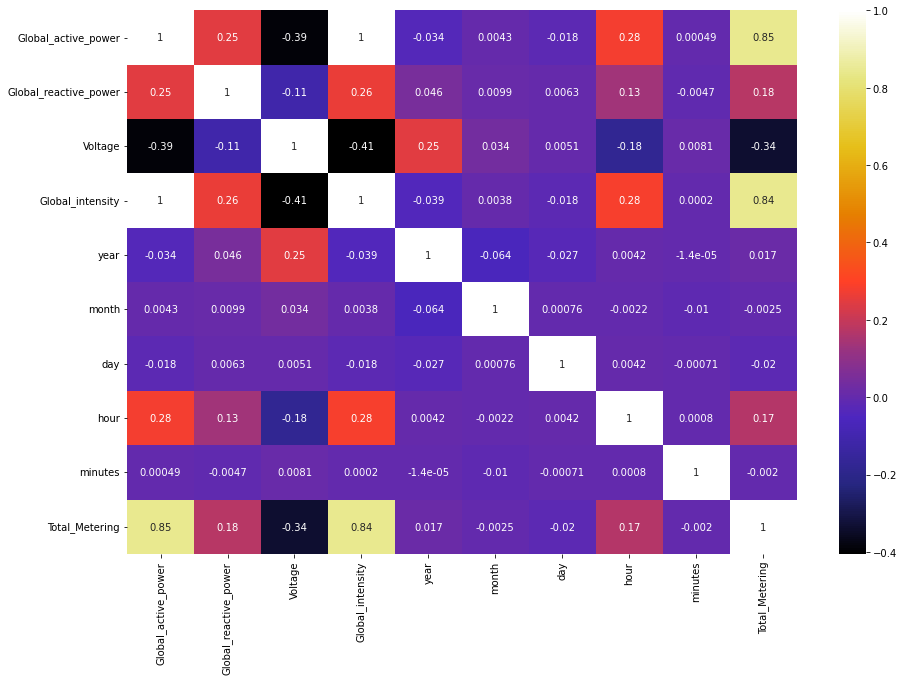

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), annot=True, cmap='CMRmap')
plt.show()

## "Global_intensity" and "Global_active_power" are highly correlated, so we drop "Global_active_power" 
## "Global_active_power" and "year" are negatively correlated.

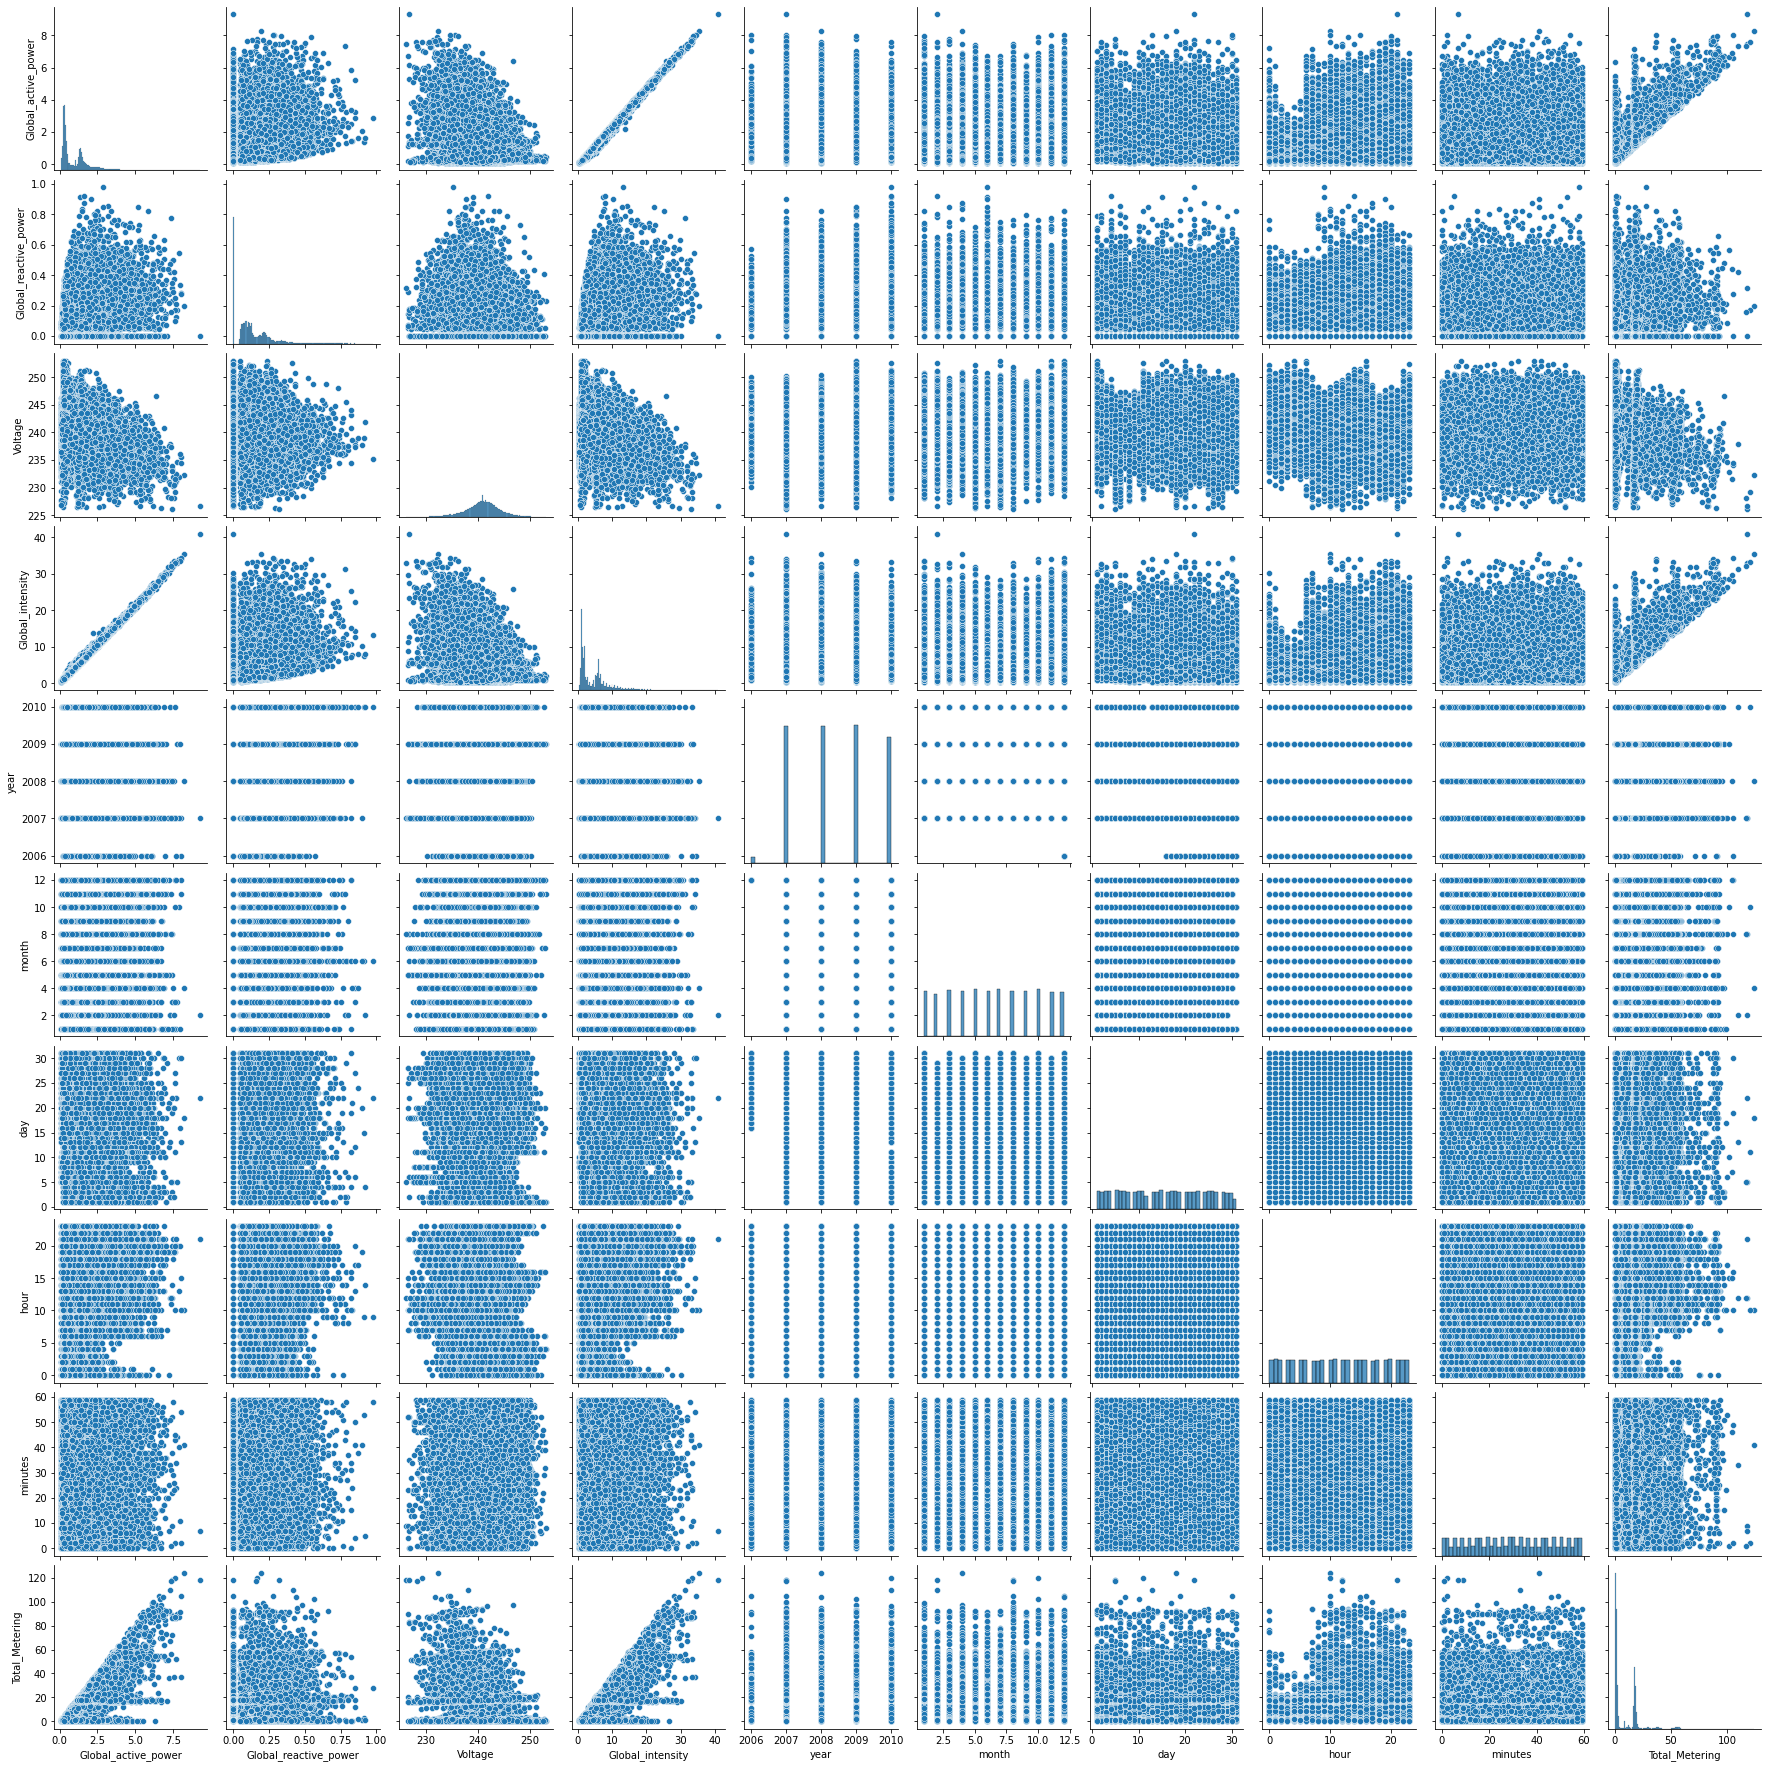

In [36]:
## Plotting pair plot to visualize graphically
sns.pairplot(data2)

In [37]:
print("The list of columns in dataset are :\n",data2.columns)

The list of columns in dataset are :
 Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'year', 'month', 'day', 'hour', 'minutes',
       'Total_Metering'],
      dtype='object')


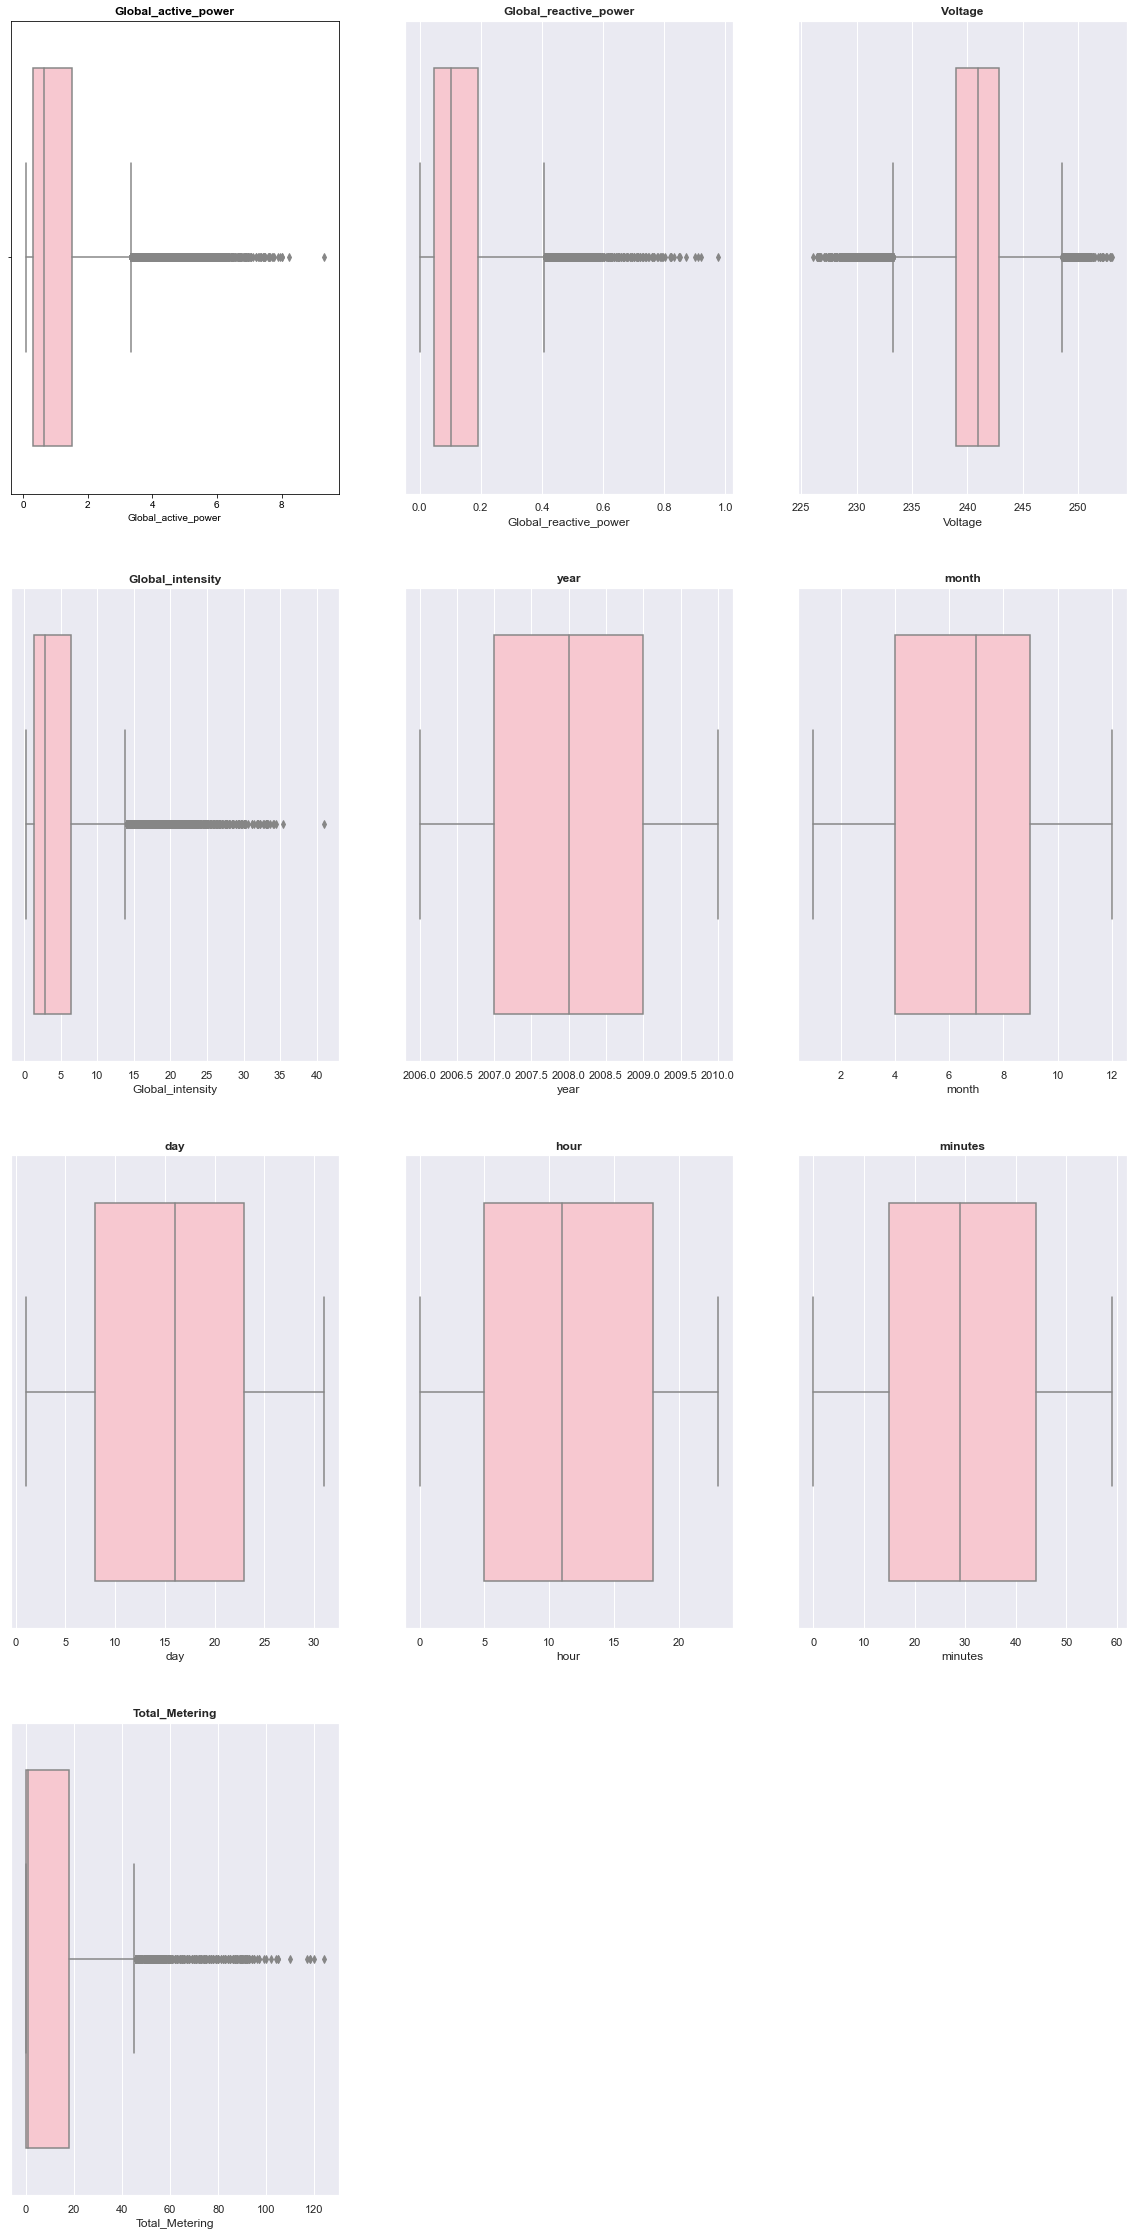

In [38]:
## boxplot 
plt.figure(figsize=(20,40))
for i in enumerate(Num_fea):
    plt.subplot(4, 3, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=data2, x=i[1], color='pink')
    plt.title("{}".format(i[1]), fontweight='bold')
    
## Global_active_power: outliers on higher side
## Global_reactive_power: outliers on higher side
## voltage: outliers on both sides
## Global_intensity: outliers on both sides
## Total_Metering: outliers on both sides

In [39]:
## Function for outliers thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.70)
    interquantile_range = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * interquantile_range
    lower_limit = quartile1 - 1.5 * interquantile_range
    return lower_limit, upper_limit

In [40]:
## Function for replacement of outliers 
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < lower_limit), variable] = lower_limit
        dataframe.loc[(dataframe[variable] > upper_limit), variable] = upper_limit

In [41]:
# Getting the lower limit and higher limit of the distribution

for column in ["Global_reactive_power", "Global_intensity", "Total_Metering"]:
    outlier_thresholds(data2, column)

In [42]:
# Replacing the outliers with lower and higher limits 
replace_with_thresholds(data2, ["Global_reactive_power", "Global_intensity", "Total_Metering"])

In [43]:
## Checking Multicollinearity
data_VIF = pd.DataFrame()
data_VIF['VIF'] = [variance_inflation_factor(data2.values, i) for i in range(len(data2.columns))]
data_VIF['features'] = data2.columns
data_VIF

,VIF,features
0,29.754864,Global_active_power
1,2.508692,Global_reactive_power
2,6825.422105,Voltage
3,33.781785,Global_intensity
4,6922.615478,year
5,4.615544,month
6,4.153308,day
7,4.220408,hour
8,3.918476,minutes
9,5.375724,Total_Metering


In [44]:
## Dropping columns as Multicollinearity is detected
data3 = data2.drop(columns=['Voltage', 'Global_active_power',  'year'])
data3.head()

,Global_reactive_power,Global_intensity,month,day,hour,minutes,Total_Metering
28343,0.236,10.2,5,1,9,47,0.0
911516,0.206,1.6,9,9,17,20,1.0
1686416,0.000,7.6,1,3,20,20,1.0
384969,0.000,0.4,10,9,1,33,0.0
220807,0.182,1.8,5,19,1,31,0.0


In [45]:
print("The datatypes of columns are \n",data3.dtypes)

The datatypes of columns are 
 Global_reactive_power    float64
Global_intensity         float64
month                      int64
day                        int64
hour                       int64
minutes                    int64
Total_Metering           float64
dtype: object


In [46]:
## To reset the indexes of the records
## And dropping the index column

df_DB = data3.reset_index()    
df_DB.drop(['index'], axis=1, inplace=True)
df_DB

,Global_reactive_power,Global_intensity,month,day,hour,minutes,Total_Metering
0,0.236,10.2,5,1,9,47,0.0
1,0.206,1.6,9,9,17,20,1.0
2,0.000,7.6,1,3,20,20,1.0
3,0.000,0.4,10,9,1,33,0.0
4,0.182,1.8,5,19,1,31,0.0
...,...,...,...,...,...,...,...
51876,0.415,10.4,12,30,15,23,20.0
51877,0.050,1.2,3,12,3,51,0.0
51878,0.050,7.2,8,1,7,7,18.0
51879,0.264,4.4,11,5,20,2,1.0


In [47]:
## Checking null values
df_DB.isnull().sum()

Global_reactive_power    0
Global_intensity         0
month                    0
day                      0
hour                     0
minutes                  0
Total_Metering           0
dtype: int64

In [48]:
## printing client

client = pymongo.MongoClient("mongodb://localhost:27017/")
print(client)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [49]:
mydatabase =client["HouseHold_Power1"]

In [50]:
mycollection=mydatabase["df_DB"]

In [51]:
## converting into dictionary(key value pairs)
dict_db= df_DB.to_dict(orient='records')
mycollection.insert_many(dict_db)

In [52]:
## retrieving data
data_mongo = mycollection.find()
data_mongo

In [53]:
## converting data into dataframe
data4 = pd.DataFrame(data_mongo)
data4

,_id,Global_reactive_power,Global_intensity,month,day,hour,minutes,Total_Metering
0,63785d99bdb941e281e23e63,0.236,10.2,5,1,9,47,0.0
1,63785d99bdb941e281e23e64,0.206,1.6,9,9,17,20,1.0
2,63785d99bdb941e281e23e65,0.000,7.6,1,3,20,20,1.0
3,63785d99bdb941e281e23e66,0.000,0.4,10,9,1,33,0.0
4,63785d99bdb941e281e23e67,0.182,1.8,5,19,1,31,0.0
...,...,...,...,...,...,...,...,...
103757,63786e73287a682e428ac86c,0.415,10.4,12,30,15,23,20.0
103758,63786e73287a682e428ac86d,0.050,1.2,3,12,3,51,0.0
103759,63786e73287a682e428ac86e,0.050,7.2,8,1,7,7,18.0
103760,63786e73287a682e428ac86f,0.264,4.4,11,5,20,2,1.0


In [54]:
## dropping id column
data4.drop('_id', axis=1, inplace=True)

In [55]:
## Independent features
X = data4.iloc[:,:-1]
X

,Global_reactive_power,Global_intensity,month,day,hour,minutes
0,0.236,10.2,5,1,9,47
1,0.206,1.6,9,9,17,20
2,0.000,7.6,1,3,20,20
3,0.000,0.4,10,9,1,33
4,0.182,1.8,5,19,1,31
...,...,...,...,...,...,...
103757,0.415,10.4,12,30,15,23
103758,0.050,1.2,3,12,3,51
103759,0.050,7.2,8,1,7,7
103760,0.264,4.4,11,5,20,2


In [56]:
## Dependent feature
y = data4['Total_Metering']
y

0          0.0
1          1.0
2          1.0
3          0.0
4          0.0
          ... 
103757    20.0
103758     0.0
103759    18.0
103760     1.0
103761    18.0
Name: Total_Metering, Length: 103762, dtype: float64

In [85]:
## Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

In [58]:
print("The number of rows and columns in X_train:\n",X_train.shape)
print("The number of rows and columns in X_test:\n",X_test.shape)
print("The number rows in y_train:\n",y_train.shape)
print("The number of rows  in y_test:\n",y_test.shape)

The number of rows and columns in X_train:
 (69520, 6)
The number of rows and columns in X_train:
 (34242, 6)
The number of rows and columns in X_train:
 (69520,)
The number of rows and columns in X_train:
 (34242,)


In [86]:
## Standardization of data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [87]:
## saving data
pickle.dump(scaler, open('HouseholdpoweSci.pkl', 'wb'))

In [88]:
scaled_data = pickle.load(open('HouseholdpoweSci.pkl', 'rb'))

In [89]:
X_train_tf = scaled_data.transform(X_train)
X_test_tf = scaled_data.transform(X_test)

In [63]:
## Linear Regression

In [64]:
# name of object:linear
linear = LinearRegression()

# Training the data
linear.fit(X_train_tf, y_train)

LinearRegression()

In [65]:
## Prediction from the test data
y_pred_linear = linear.predict(X_test_tf)
y_pred_linear

array([-0.20287504,  0.2334765 , 12.31535874, ...,  4.05741721,
       22.28957914,  2.58302941])

In [66]:
## Residuals
residuals4=y_test-y_pred_linear
print("The residuals are:\n", residuals4)

The residuals are:
 51544    1.202875
24192    1.766523
92150    6.684641
73802    5.620533
19419   -1.646913
           ...   
47123   -0.115999
54771   -0.994723
51030   -4.057417
68952   -4.289579
48282   -2.583029
Name: Total_Metering, Length: 34242, dtype: float64


In [67]:
## computing R Square
r2score_linear_reg = r2_score(y_test, y_pred_linear)
print("R Square score of Linear Regression model is : {}%".format(round(r2score_linear_reg*100, 2)))

##  Adjusted R Square
adj_R2 = 1 - (1-r2score_linear_reg)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj_R Square score of Linear Regression model is : {}%".format(round(adj_R2*100, 2)))

R Square score of Linear Regression model is : 68.47%
Adj_R Square score of Linear Regression model is : 68.46%


In [68]:
## Ridge Regression

In [69]:
# name of object:ridge
ridge = Ridge()

# Training the data
ridge.fit(X_train_tf, y_train)

## Prediction from the test data
y_pred_ridge = ridge.predict(X_test_tf)
y_pred_ridge

array([-0.20269335,  0.23359815, 12.31538078, ...,  4.05754686,
       22.28943597,  2.58310138])

In [70]:
## Residuals
residuals3=y_test-y_pred_ridge
print("The residuals are:\n", residuals3)

The residuals are:
 51544    1.202693
24192    1.766402
92150    6.684619
73802    5.620590
19419   -1.646995
           ...   
47123   -0.116054
54771   -0.994761
51030   -4.057547
68952   -4.289436
48282   -2.583101
Name: Total_Metering, Length: 34242, dtype: float64


In [71]:
## computing R Square
r2score_ridge_reg = r2_score(y_test, y_pred_ridge)
print("R Sqaure score of Ridge Regression model is : {}%".format(round(r2score_ridge_reg*100, 2)))

##  Adjusted R Square
adj_R2_ridge = 1 - (1-r2score_ridge_reg)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj_R Sqaure score of Ridge Regression model is : {}%".format(round(adj_R2_ridge*100, 2)))

R Sqaure score of Ridge Regression model is : 68.47%
Adj_R Sqaure score of Ridge Regression model is : 68.46%


In [72]:
## Lasso Regression

In [73]:
## name of object:lasso
lasso = Lasso()

## Training the data
lasso.fit(X_train_tf, y_train)

## Prediction from the test data
y_pred_lasso = lasso.predict(X_test_tf)
y_pred_lasso

## Residuals
residuals2=y_test-y_pred_lasso
print("The residuals are:\n", residuals2)

## computing R Square
r2score_lasso_reg = r2_score(y_test, y_pred_lasso)
print("R Sqaure score of Lasso Regression model is : {}%".format(round(r2score_lasso_reg*100, 2)))

## Adjusted R Square
adj_R2_lasso = 1 - (1-r2score_lasso_reg)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("adj_R Sqaure score of Lasso Regression model is : {}%".format(round(adj_R2_lasso*100, 2)))

The residuals are:
 51544   -0.756544
24192    0.694668
92150    5.963162
73802    6.219221
19419   -1.756544
           ...   
47123    0.048303
54771   -0.756544
51030   -5.817450
68952   -3.609862
48282   -3.110179
Name: Total_Metering, Length: 34242, dtype: float64
R Sqaure score of Lasso Regression model is : 67.02%
adj_R Sqaure score of Lasso Regression model is : 67.02%


In [74]:
## ElasticNet Regression

In [76]:
# name of object:elastic
elastic = ElasticNet()

## Training the data
elastic.fit(X_train_tf, y_train)

## Prediction from the test data
y_pred_elastic = elastic.predict(X_test_tf)
y_pred_elastic

## Residuals
residuals1=y_test-y_pred_elastic
print("The residuals are:\n", residuals1)

##  computing R Square
r2score_elastic_reg = r2_score(y_test, y_pred_elastic)
print("R Sqaure score of ElasticNet Regression model is : {}%".format(round(r2score_elastic_reg*100, 2)))

##  Adjusted R Square
adj_R2_elastic = 1 - (1-r2score_elastic_reg)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adj_R Sqaure score of ElasticNet Regression model is : {}%".format(round(adj_R2_elastic*100, 2)))

The residuals are:
 51544   -2.741827
24192   -1.422839
92150    7.283457
73802    6.878400
19419   -3.741827
           ...   
47123   -2.465873
54771   -2.741827
51030   -6.612725
68952    0.222673
48282   -4.698793
Name: Total_Metering, Length: 34242, dtype: float64
R Sqaure score of ElasticNet Regression model is : 58.52%
Adj_R Sqaure score of ElasticNet Regression model is : 58.51%


In [77]:
# name of object:svr
svr = SVR()

In [78]:
## training the data
svr.fit(X_train_tf, y_train)

SVR()

In [79]:
## Prediction from the test data
y_pred_svr = svr.predict(X_test_tf)
y_pred_svr

array([ 0.3040357 ,  0.78321051, 13.62299208, ...,  0.41429884,
       19.51801222,  3.02326299])

In [80]:
## residuals
residuals=y_test-y_pred_svr
print("The residuals are:\n", residuals)

The residuals are:
 51544    0.695964
24192    1.216789
92150    5.377008
73802    0.964841
19419   -0.118591
           ...   
47123    0.025508
54771    0.102577
51030   -0.414299
68952   -1.518012
48282   -3.023263
Name: Total_Metering, Length: 34242, dtype: float64


In [81]:
## computing R Square
r2score_svr = r2_score(y_test, y_pred_svr)
print("R2 score of SVR model is : {}%".format(round(r2score_svr*100, 2)))
##  Adjusted R Square
adj_R2_svr = 1 - (1-r2score_svr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("adj_R2 score of SVR model is : {}%".format(round(adj_R2_svr*100, 2)))

R2 score of SVR model is : 74.47%
adj_R2 score of SVR model is : 74.47%


In [82]:
print("Display of Model's Scores \n")
print("Linear Regression model's score is : ",(round(adj_R2*100, 2)))
print("Ridge Regression model's score is : ",(round(adj_R2_ridge*100, 2)))
print("Lasso Regression model's score is : ",(round(adj_R2_lasso*100, 2)))
print("ElasticNet Regression model's score is : ",(round(adj_R2_elastic*100, 2)))
print("SVR model's score is : ", (round(adj_R2_svr*100, 2)))

Display of Model's Scores 

Linear Regression model's score is :  68.46
Ridge Regression model's score is :  68.46
Lasso Regression model's score is :  67.02
ElasticNet Regression model's score is :  58.51
SVR model's score is :  74.47


In [ ]:
## Support Vector Regressor model(SVR)  has the best accuracy 

In [83]:
## Making a dataframe of r square and adjusted r square values of each model 
Accuracy=pd.DataFrame({'Model Name':['Linear Regression','Ridge Regression','Lasso Regression','ElasticNet Regression','Support Vector Regression'],'r Square Value':[r2score_linear_reg,r2score_ridge_reg,r2score_lasso_reg,r2score_elastic_reg,r2score_svr],'Adjusted R square value':[adj_R2,adj_R2_ridge,adj_R2_lasso,adj_R2_elastic,adj_R2_svr]})

In [84]:
## Printing the r square values and Adjusted r sqaure values of each model
Accuracy

,Model Name,r Square Value,Adjusted R square value
0,Linear Regression,0.684681,0.684626
1,Ridge Regression,0.684681,0.684626
2,Lasso Regression,0.670220,0.670162
3,ElasticNet Regression,0.585182,0.585109
4,Support Vector Regression,0.744703,0.744659
